### Part 1: Importing the libraries & Reading data.[Here](#Part-1:-Importing-the-libraries-&-Reading-data.)
### Part 2: Exploring the data.[Here](#Part-2:-Exploring-the-data.)
### Part 3: business  questions:[Here](#Part-3:-bussiness-questions:)
>* [**Q1: The number of Movies/TV Shows each year?**](#Q1:-The-number-of-Movies/TV-Shows-each-year?)
>* [**Q2: Most categories appeared in the last years?**](#Q2:-Most-categories-appeared-in-the-last-years?)
>* [**Q3: What most common directors appeared in the last years?**](#Q3:-What-most-common-directors-appeared-in-the-last-years?)
>* [**Q4: What most common country in Movies/TV Shows appeared in the last years?**](#Q4:-What-most-common-country-in-Movies/TV-Shows-appeared-in-the-last-years?)
>* [**Q5: how many Movies/TV Shows since it was added?**](#Q5:-how-many-Movies/TV-Shows-since-it-was-added?)
>* [**Q6: how many added Movies/TV by month?**](#Q6:-how-many-added-Movies/TV-by-month?)
>* [**Q7: how many added Movies/TV by day?**](#Q7:-how-many-added-Movies/TV-by-day?)
>* [**Q8: Most common cast appeared in the last years?**](#Q8:-Most-common-cast-appeared-in-the-last-years?)
>* [**Q9: Which one get more movies or TV shows?**](#Q9:-Which-one-get-more-movies-or-TV-shows?)
>* [**Q10: What is the type of rating that have the highest number?**](#Q10:-What-is-the-type-of-rating-that-have-the-highest-number?)

### Part 4: Fill NaN Values for Every columns.[Here](#Part-4:-Fill-NaN-Values-for-Every-columns.)
### Part 5: time series modeling:[Here](#Part-5:-time-series-modeling:)
>* [**Visualize the time series**](#Visualize-the-time-series)
>* [**Stationarize the series**](#Stationarize-the-series)
>* [**Plot ACF/PACF charts**](#Plot-ACF/PACF-charts)
>* [**Build the ARIMA model**](#Build-the-ARIMA-model)
>* [**Diagnostic the Model**](#Diagnostic-the-Model)
>* [**Make Predictions**](#Make-Predictions)

## Part 1: Importing the libraries & Reading data.

In [1]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 3.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from datetime import datetime
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import plotly.express as px
import statsmodels.api as sm
import pmdarima as pm

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("../input/netflix-shows/netflix_titles.csv",sep = "," , encoding = "utf-8")

## Part 2: Exploring the data.

In [4]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [5]:
df.shape

(8807, 12)

### check if there is a Null in data

In [6]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### check if there is a duplication in data

In [7]:
(df.drop_duplicates()).shape

(8807, 12)

> **no duplication in data**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#### Data type of date_added is object !!!
#### Data type of release_year is int64 !!!

### Convert date_added from Object Type to datetime Type

In [9]:
df['date_added']=pd.to_datetime(df['date_added'])

In [10]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


## Part 3: bussiness questions:

### Q1: The number of Movies/TV Shows each year? 

In [12]:
Movie_year=df.groupby(['release_year'])["type"].value_counts()
Movie_year=pd.DataFrame(Movie_year)
Movie_year.rename(columns = {'type':'count'}, inplace = True)
Movie_year=Movie_year.reset_index()
Movie_year=Movie_year.sort_values(by=["release_year",'type'],ascending=False)
Movie_year=Movie_year.reset_index(drop = True)

In [13]:
Movie_year.tail(3)

,release_year,type,count
116,1943,Movie,3
117,1942,Movie,2
118,1925,TV Show,1


In [14]:
df[(df['release_year']==1942) | (df['release_year']==1925)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,2018-12-30,1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...
7790,s7791,Movie,Prelude to War,Frank Capra,NaN,United States,2017-03-31,1942,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...
8205,s8206,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,2017-03-31,1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...


In [15]:
fig = px.line(Movie_year, x = "release_year", y = "count",
              color = "type",title ='The number of Movies/TV Shows each year',
              labels={'release_year':'Release Year','count':'The number of Movies/TV Shows'})
fig.show()

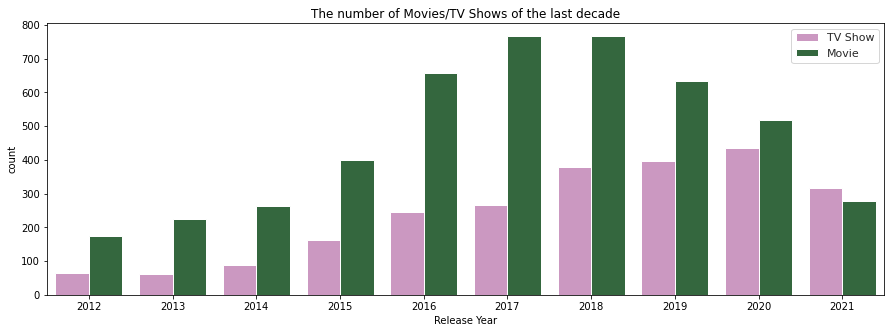

In [16]:
# create plot
f, ax = plt.subplots(figsize=(15, 5))
sns.set(style='whitegrid')
sns.barplot(data=Movie_year.head(20),x='release_year',hue='type',y='count',palette='cubehelix_r')
ax.set(title='The number of Movies/TV Shows of the last decade', ylabel='count',xlabel='Release Year')
plt.legend(loc='upper right')
plt.show()

>* **As we can see from the plots, we find both films and TV Shows that are constantly increasing together until 2018**
>* **In 2019, we notice a difference, as films began to decrease from the previous year until significantly in 2021**
>* **TV Shows continued to rise in 2019 and 2020 but decreased significantly in 2021**
>* **We note that the first program was Pioneers: First Women Filmmakers in 1925**
>* **We note that in 1942 the USA witnessed the emergence of films through the Prelude to War movie and The Battle of Midway movie.**

### Q2: Most categories appeared in the last years?

In [17]:
dic={}
data= df[df['type']=='TV Show']
for x,y in data['listed_in'].items():
    data=y.split(',')
    for i in data:
        i=i.strip()
        if i in dic.keys():
            dic[i]=dic[i]+1
        else:
            dic[i]=1
categories_Show=pd.DataFrame(list(dic.values()),index=list(dic.keys()),columns=["Count"])
categories_Show=categories_Show.sort_values(by='Count',ascending=False)
categories_Show= categories_Show.reset_index()

In [18]:
dic={}
data= df[df['type']=='Movie']
for x,y in data['listed_in'].items():
    data=y.split(',')
    for i in data:
        i=i.strip()
        if i in dic.keys():
            dic[i]=dic[i]+1
        else:
            dic[i]=1
categories_mov=pd.DataFrame(list(dic.values()),index=list(dic.keys()),columns=["Count"])
categories_mov=categories_mov.sort_values(by='Count',ascending=False)
categories_mov= categories_mov.reset_index()

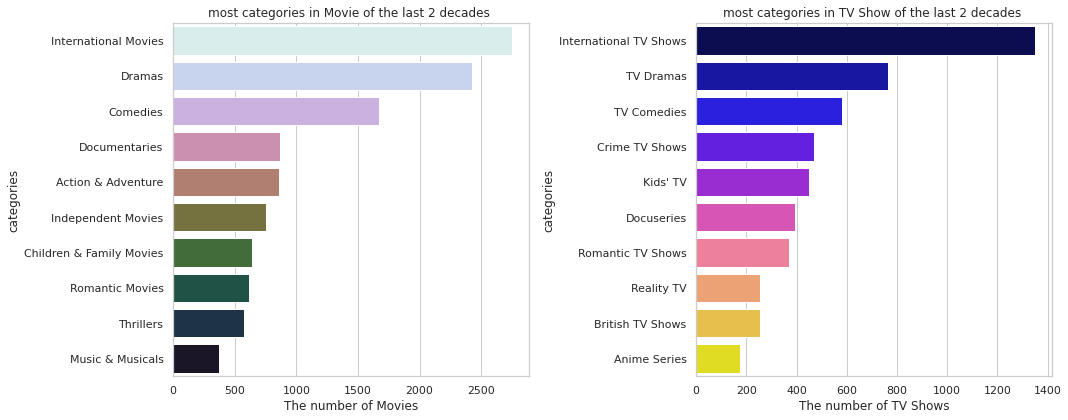

In [19]:
# create plot
f, ax = plt.subplots(1,2,figsize=(15, 6))
ax = np.ravel(ax)

sns.set(style='whitegrid')
sns.barplot(data=categories_mov.head(10),y='index',x='Count',ax=ax[0],palette='cubehelix_r')
ax[0].set(title='most categories in Movie of the last 2 decades ', ylabel='categories',xlabel='The number of Movies')
sns.barplot(data=categories_Show.head(10),y='index',x='Count',ax=ax[1],palette='gnuplot2')
ax[1].set(title='most categories in TV Show of the last 2 decades ', ylabel='categories',xlabel='The number of TV Shows')
ax = np.reshape(ax, (1, 2))
plt.tight_layout()
plt.show()

>* **We note that Movies and TV Shows of the category International, Dramas and Comedies are the most common categories**

In [20]:
data_df=df.copy()
cat1=['International', 'Dramas', 'Comedies']
dic={
'release_year':[],
'type':[],
'International':[],
 'Dramas':[],
 'Comedies':[]
}
key=list(dic.keys())
data_df=data_df[data_df['release_year']>1980].reset_index(drop=True)
for x in data_df.index:
    y=data_df.iloc[x]
    dic['release_year'].append(y['release_year'])
    dic['type'].append(y['type'])
    data=y['listed_in'].split(',')
    data=[x.strip() for x in data]
    for i in data:
        if cat1[0] in i:
            try:
                dic[cat1[0]][x]=1
            except:
                dic[cat1[0]].append(1)
            data[data.index(i)]=cat1[0]
        elif cat1[1] in i:
            try:
                dic[cat1[1]][x]=1
            except:
                dic[cat1[1]].append(1)
                
            data[data.index(i)]=cat1[1]
        elif cat1[2] in i:
            try:
                dic[cat1[2]][x]=1
            except:
                dic[cat1[2]].append(1)
            data[data.index(i)]=cat1[2]
            
    temp = [x for x in cat1 if x not in data]
    for i in temp:
        if i in cat1:
            try:
                dic[i][x]=0
            except:
                dic[i].append(0)

In [21]:
data=pd.DataFrame(dic,index=range(0,x+1)).sort_values('release_year',ascending=False)
data=data.reset_index(drop=True)
data.drop('type',axis=1,inplace=True)
data=data.groupby('release_year').sum()
data=data.reset_index()

fig = px.line(data, x = "release_year",y=data.columns[1:4],title ='The number of Movies/TV Shows for each year acording to Top 3 Movies/TV Shows categories',
              labels={'release_year':'Release Year','count':'The number of Movies/TV Shows'})
fig.show()

>* **We note that the three most common categories were appearing in 19th century films, in a very small number.**
>* **It can be said that the three categories did not exist in the 19th century except for a number of Movies/TV Shows.** 
>* **with the beginning of the 20th century the number of Movies/TV Shows began to increase and with it the number of Movies/TV Shows 
under these three categories increased.**
>* **Until the year 2018, and the number of Movies/TV Shows decreased, and with it the number of Movies/TV Shows in these three categories decreased.**

### Q3: What most common directors appeared in the last years?

In [22]:
dic={}
data= df
for x,y in data['director'].dropna().items():
    data=y.split(',')
    for i in data:
        i=i.strip()
        if i in dic.keys():
            dic[i]=dic[i]+1
        else:
            dic[i]=1
director=pd.DataFrame(list(dic.values()),index=list(dic.keys()),columns=["Count"])
director=director.sort_values(by='Count',ascending=False)
director= director.reset_index()

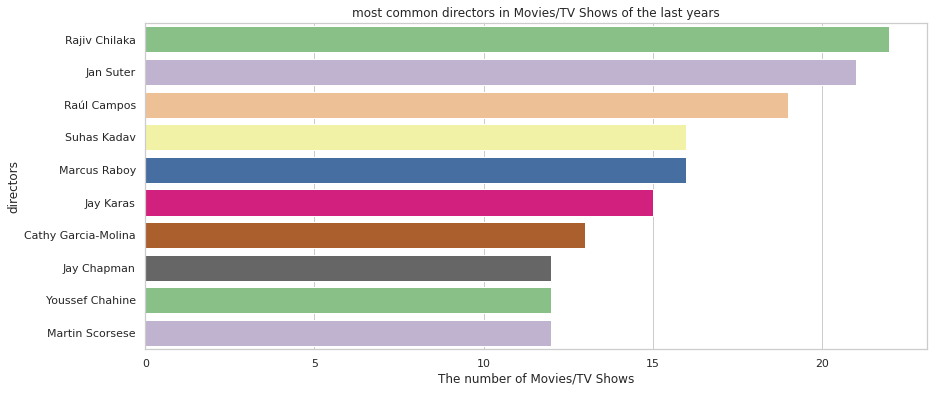

In [23]:
# create plot
f, ax = plt.subplots(figsize=(14, 6))

sns.set(style='whitegrid')
sns.barplot(data=director.head(10),y='index',x='Count',palette='Accent')
ax.set(title='most common directors in Movies/TV Shows of the last years', ylabel='directors',xlabel='The number of Movies/TV Shows')


plt.show()

In [24]:
director

,index,Count
0,Rajiv Chilaka,22
1,Jan Suter,21
2,Raúl Campos,19
3,Suhas Kadav,16
4,Marcus Raboy,16
...,...,...
4988,Raymie Muzquiz,1
4989,Stu Livingston,1
4990,Joe Menendez,1
4991,Eric Bross,1


In [25]:
data_df=df.copy()
cat1=['Rajiv Chilaka','Jan Suter', 'Raúl Campos']
dic={
    'release_year':[],
    'type':[],
    'Rajiv Chilaka':[],
    'Jan Suter':[], 
    'Raúl Campos':[]
}
key=list(dic.keys())
data_df=data_df[(data_df['director'].notna()) & (data_df['release_year']>2000)].reset_index(drop=True)
for x in data_df.index:
    y=data_df.iloc[x]
    dic['release_year'].append(y['release_year'])
    dic['type'].append(y['type'])
    data=y['director'].split(',')
    data=[x.strip() for x in data]
    for i in data:
        if i in cat1:
            dic[i].append(1)
    
    temp = [x for x in cat1 if x not in data]
    for i in temp:
        if i in cat1:
            dic[i].append(0)

In [26]:
data=pd.DataFrame(dic,index=range(0,x+1)).sort_values('release_year',ascending=False)
data=data.reset_index(drop=True)
data.drop('type',axis=1,inplace=True)
data=data.groupby('release_year').sum()
data=data.reset_index()

fig = px.line(data, x = "release_year",y=data.columns[1:6],title ='The number of Movies/TV Shows for each year acording to Top 5 Movies/TV Shows directors',
              labels={'release_year':'Release Year','value':'The number of Movies/TV Shows'})
fig.show()

>* **Rajiv Chilaka : he is the most participating director in  Movies/TV Shows in our Dataset by 22 Movies/TV Shows**
>* **Jan Suter : He managed to work as a director in 21 Movies/TV Shows in only three years.**
>* **Raúl Campos : He managed to work as a director in 19 Movies/TV Shows in only three years**

### Q4: What most common country in Movies/TV Shows appeared in the last years?

In [27]:
dic={}
data_df= df[(df['country'].notna())].reset_index(drop=True)
for x in data_df.index:
    y=data_df.iloc[x]
    data=y['country'].split(',')
    for i in data:
        i=i.strip()
        if i not in dic.keys():
            dic[i]=[0,0]
            
        if y['type']=='Movie':
            dic[i][0]=dic[i][0]+1
        else:
            dic[i][1]=dic[i][1]+1

country=pd.DataFrame(list(dic.values()),index=list(dic.keys()),columns=["Movie",'TV Show'])
country['total']=country['Movie']+country['TV Show']
country=country.sort_values(by=['total'],ascending=False)
country= country.reset_index()

In [28]:

fig = px.line(country.head(15), x = "index",y=country.columns[1:3],title ='The number of Movies/TV Shows for each country',
              labels={'index':'country','value':'The number of Movies/TV Shows'})
fig.show()

>* **hollywood in USA and Bollywood in India play a great role to make this countries at the top of number of Movies/TV Shows that appeared in the last years.**

### Q5: how many Movies/TV Shows since it was added?

In [29]:
data=(df.groupby('date_added')[['show_id']].count())
data=(data.resample("4W").sum())

In [30]:

fig = px.line(data, x = data.index,
              y='show_id',
              title ='The number of Movies/TV Shows for each added date',
              labels={'date_added':'Added Date','show_id':'The number of Movies/TV Shows'})
fig.show()

>* **It can be noted that the number of films that were added began to increase with the beginning of 2016**

### Q6: how many added Movies/TV by month?

In [31]:
data=(df.groupby('date_added')[['show_id']].count())
data['month_name'] = data.index.month_name()

In [32]:
month_name=data.groupby('month_name').sum()
month_name=month_name.sort_values('show_id')

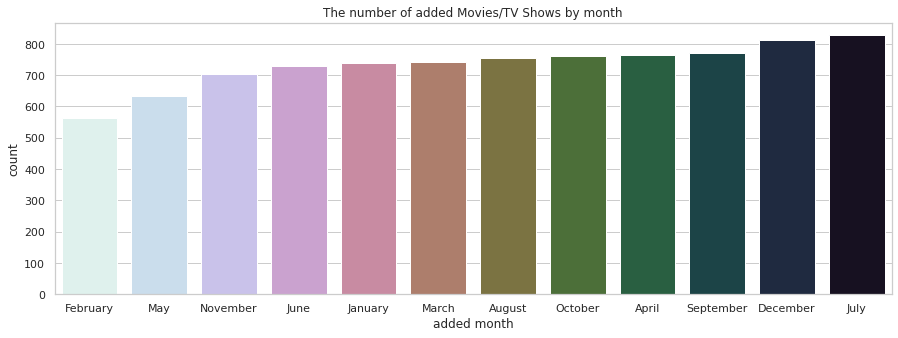

In [33]:
# create plot
f, ax = plt.subplots(figsize=(15, 5))
sns.set(style='whitegrid')
sns.barplot(data=month_name,x=month_name.index,y='show_id',palette='cubehelix_r')
ax.set(title='The number of added Movies/TV Shows by month', ylabel='count',xlabel='added month')
plt.show()

>* **July has the max number of added Movies/TV Shows by month**
>* **February has the min number of added Movies/TV Shows by month**

### Q7: how many added Movies/TV by day?

In [34]:
data=(df.groupby('date_added')[['show_id']].count())
data['day_name'] = data.index.day_name()

In [35]:
day_name=data.groupby('day_name').sum()
day_name=day_name.sort_values('show_id')

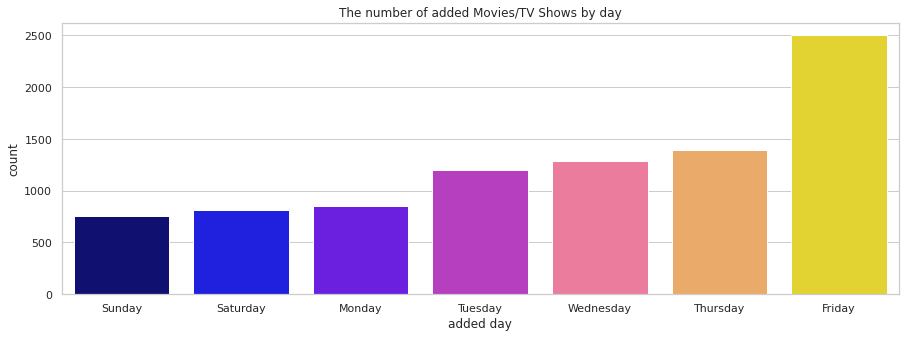

In [36]:
# create plot
f, ax = plt.subplots(figsize=(15, 5))
sns.set(style='whitegrid')
sns.barplot(data=day_name,x=day_name.index,y='show_id',palette='gnuplot2')
ax.set(title='The number of added Movies/TV Shows by day', ylabel='count',xlabel='added day')
plt.show()

>* **Friday has the max number of added Movies/TV Shows by day**
>* **Sunday has the min number of added Movies/TV Shows by day**

### Q8: Most common cast appeared in the last years?

In [37]:
dic={}
data= df
for x,y in data['cast'].dropna().items():
    data=y.split(',')
    for i in data:
        i=i.strip()
        if i in dic.keys():
            dic[i]=dic[i]+1
        else:
            dic[i]=1
cast=pd.DataFrame(list(dic.values()),index=list(dic.keys()),columns=["Count"])
cast=cast.sort_values(by='Count',ascending=False)
cast= cast.reset_index()

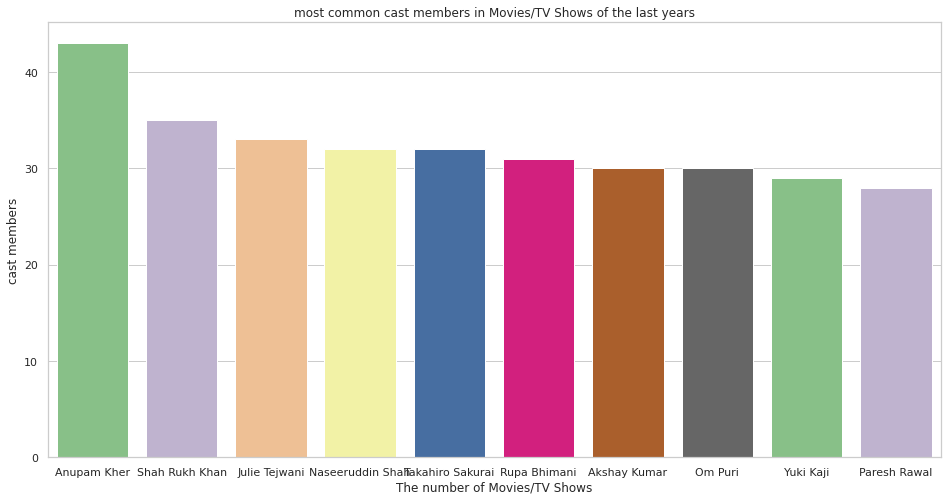

In [38]:
# create plot
f, ax = plt.subplots(figsize=(16, 8))

sns.set(style='whitegrid')
sns.barplot(data=cast.head(10),x='index',y='Count',palette='Accent')
ax.set(title='most common cast members in Movies/TV Shows of the last years', ylabel='cast members',xlabel='The number of Movies/TV Shows')


plt.show()

In [39]:
cast

,index,Count
0,Anupam Kher,43
1,Shah Rukh Khan,35
2,Julie Tejwani,33
3,Naseeruddin Shah,32
4,Takahiro Sakurai,32
...,...,...
36434,Maryam Zaree,1
36435,Melanie Straub,1
36436,Gabriela Maria Schmeide,1
36437,Helena Zengel,1


In [40]:
data_df=df.copy()
cat1=['Anupam Kher', 'Shah Rukh Khan', 'Julie Tejwani']
dic={
    'release_year':[],
    'type':[],
    'Anupam Kher':[], 
    'Shah Rukh Khan':[],
    'Julie Tejwani':[],
}
key=list(dic.keys())
data_df=data_df[(data_df['cast'].notna())& (data_df['release_year']>1980)].reset_index(drop=True)
for x in data_df.index:
    y=data_df.iloc[x]
    dic['release_year'].append(y['release_year'])
    dic['type'].append(y['type'])
    data=y['cast'].split(',')
    data=[x.strip() for x in data]
    for i in data:
        if i in cat1:
            dic[i].append(1)
    
    temp = [x for x in cat1 if x not in data]
    for i in temp:
        if i in cat1:
            dic[i].append(0)

In [41]:
data=pd.DataFrame(dic,index=range(0,x+1)).sort_values('release_year',ascending=False)
data=data.reset_index(drop=True)
data.drop('type',axis=1,inplace=True)
data=data.groupby('release_year').sum()
data=data.reset_index()

fig = px.line(data, x = "release_year",y=data.columns[1:5],title ='The number of Movies/TV Shows for each year acording to Top 5 Movies/TV Shows cast members',
              labels={'release_year':'Release Year','value':'The number of Movies/TV Shows'})
fig.show()

>* **Anupam Kher : He managed to work as a director in 43 Movies/TV Shows from 1990 to 2019, and he is the most participating cast member in  Movies/TV Shows in our Dataset**
>* **Shah Rukh Khan : He managed to work as a cast member in 35 Movies/TV Shows from 1992 to 2019**

### Q9: Which one get more movies or TV shows?

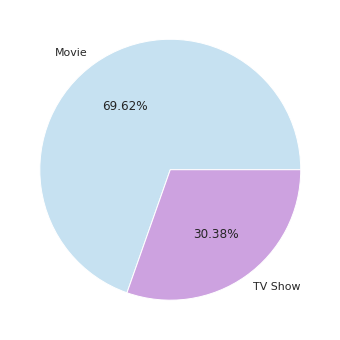

In [42]:
data=df['type'].value_counts()
labels=data.index
#define Seaborn color palette to use
colors = sns.color_palette('cubehelix_r')[:10]

#create pie chart
f, ax = plt.subplots(figsize=(14, 6))

plt.pie(data, labels = labels, colors = colors,autopct='%1.2f%%')
plt.show()

>* **From the figure, we notice that the number of Movies doubles the number of TV Shows, and this shows the extent of the investment in this field due to its characteristics over the TV Shows and also reflects the extent of interest in them**

### Q10: What is the type of rating that have the highest number?

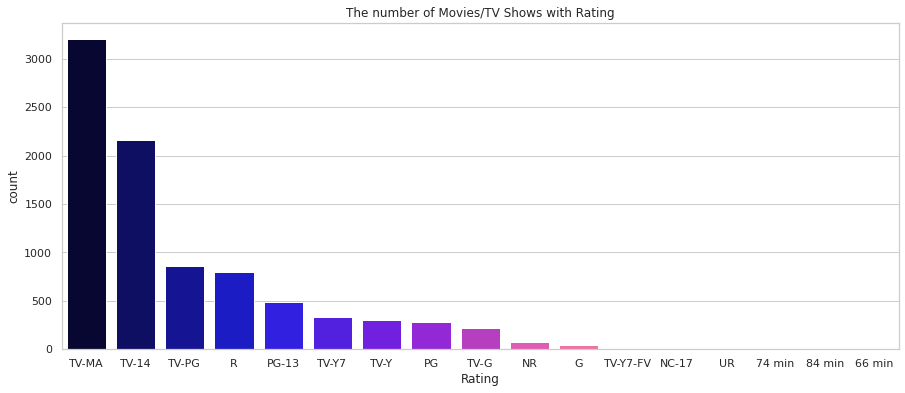

In [43]:
data=(df['rating'].dropna()).value_counts()
# create plot
f, ax = plt.subplots(figsize=(15, 6))
sns.set(style='whitegrid')
sns.barplot(x=data.index,y=(data.values),palette='gnuplot2',errwidth=0)
ax.set(title='The number of Movies/TV Shows with Rating', ylabel='count',xlabel='Rating')
plt.show()

>* **From the figure, we notice that most Movies/TV Shows have TV-MA rating**

## Part 4: Fill NaN Values for Every columns.

In [44]:
df_=df.copy()

In [45]:
missing_columns=df.isnull().sum()
missing_columns[missing_columns>0]

director      2634
cast           825
country        831
date_added      10
rating           4
duration         3
dtype: int64

### 1. director

In [46]:
def get_director(row):
    if pd.isnull(row['director']):
        year=row['release_year']
        year_type=row['type']
        data_year=df[df['director'].notnull()]
        data_year=data_year[data_year['release_year'].isin([year+1,year-1,year])]
        data_year1=data_year[(data_year['type']==year_type)]
        
        if pd.notnull(row['country']):
            country=row['country']
            split_country=country.split(',')
            split_country=[x.strip() for x in split_country]
            split_country.append(country.strip())
            split_country=list(set(split_country))
            data_year=data_year1[data_year1['country'].isin(split_country)] 
            if len(data_year)==0:
                data_year=data_year1
                
        data_year=pd.DataFrame(data_year['director'].value_counts())
        data_year.rename(columns = {'director':'count'}, inplace = True)
        data_year.reset_index(inplace=True)
        data_year=(data_year.sort_values(by='count',ascending=False)).head()
        try:
            random_sample=np.random.choice(data_year['index'],1)
            return random_sample[0]
        except:
            random_sample=np.random.choice(df['director'].dropna(),1)
            return random_sample[0]
    else:
        return row['director']
df_['director']=df_.apply(get_director,axis=1)

In [47]:
df_.isnull().sum()['director']

0

### 2. cast

In [48]:
def get_cast(row):
    if pd.isnull(row['cast']):
        year=row['release_year']
        year_type=row['type']
        data_year=df[df['cast'].notnull()]
        data_year=data_year[data_year['release_year'].isin([year+1,year-1,year])]
        data_year1=data_year[(data_year['type']==year_type)]
        
        if pd.notnull(row['country']):
            country=row['country']
            split_country=country.split(',')
            split_country=[x.strip() for x in split_country]
            split_country.append(country.strip())
            split_country=list(set(split_country))
            data_year=data_year1[data_year1['country'].isin(split_country)]
            if len(data_year)==0:
                data_year=data_year1
                
        data_year=pd.DataFrame(data_year['cast'].value_counts())
        data_year.rename(columns = {'cast':'count'}, inplace = True)
        data_year.reset_index(inplace=True)
        data_year=(data_year.sort_values(by='count',ascending=False)).head()             
        try:
            random_sample=np.random.choice(data_year['index'],1) 
            return random_sample[0]
        except:
            random_sample=np.random.choice(df['cast'].dropna(),1)
            return random_sample[0]
    else:
        return row['cast']
df_['cast']=df_.apply(get_cast,axis=1)

In [49]:
df_.isnull().sum()['cast']

0

### 3. date_added

In [50]:
df_['date_added']= df_['date_added'].fillna(method="ffill")

In [51]:
df_.isnull().sum()['date_added']

0

### 4. country

In [52]:
fill_list = df_['country'].dropna().tolist()
df_['country'] = df_['country'].fillna(pd.Series(np.random.choice(fill_list , size = len(df_.index))))

In [53]:
df_.isnull().sum()['country']

0

### 5. rating

In [54]:
fill_list = df_['rating'].dropna().tolist()
df_['rating'] = df_['rating'].fillna(pd.Series(np.random.choice(fill_list , size = len(df_.index))))

In [55]:
df_.isnull().sum()['rating']

0

### 6. duration

In [56]:
fill_list = df_['duration'].dropna().tolist()
df_['duration'] = df_['duration'].fillna(pd.Series(np.random.choice(fill_list , size = len(df_.index))))

In [57]:
df_.isnull().sum()['duration']

0

In [58]:
df_

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Kevin Hart,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Kongkiat Komesiri,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...","Mexico, United States",2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,"Alex Woo, Stanley Moore","Aishwarya Rajesh, Vidhu, Surya Ganapathy, Madh...",Thailand,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Soumendra Padhi,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Marcus Raboy,"Prabhas, Rana Daggubati, Anushka Shetty, Taman...",Indonesia,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


## Part 5: time series modeling:
>* **Visualize the time series**
>* **Stationarize the series**
>* **Plot ACF/PACF charts**
>* **Build the ARIMA model**
>* **Diagnostic the Model**
>* **Make Predictions**

### Visualize the time series

In [59]:
indexedDataset = df_.groupby(pd.Grouper(key='date_added', axis=0, freq='M'))["show_id"].count()
indexedDataset=indexedDataset.to_frame()
indexedDataset = indexedDataset.rename({"show_id": "value"} , axis = 1)
indexedDataset.head()

,value
date_added,
2008-01-31,1
2008-02-29,1
2008-03-31,0
2008-04-30,0
2008-05-31,0


In [60]:
indexedDataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 165 entries, 2008-01-31 to 2021-09-30
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   165 non-null    int64
dtypes: int64(1)
memory usage: 2.6 KB


In [61]:
fig = px.line(indexedDataset, x = indexedDataset.index,
              y='value',
              title ='The number of Movies/TV Shows for each added date',
              labels={'date_added':'Added Date','value':'The number of Movies/TV Shows'})
fig.show()

In [62]:
start_date = '2015-1-1'
data = (indexedDataset.index > start_date)
data=indexedDataset.loc[data]
data.head()

,value
date_added,
2015-01-31,1
2015-02-28,4
2015-03-31,5
2015-04-30,5
2015-05-31,6


### Stationarize the series

#### Tests to check if a series is stationary or not
>* **Rolling Statistics**
>* **ADCF Test - Augmented Dickey–Fuller test**

**Tests to check if a series is stationary or not**  
*A. There are 2 ways to check for Stationarity of a TS:*  
>* a) Rolling Statistics - Plot the moving avg or moving standard deviation to see if it varies with time. Its a visual technique.  
>* b) ADCF Test - Augmented Dickey–Fuller test is used to gives us various values that can help in identifying stationarity. The Null hypothesis says that a TS is non-stationary. It comprises of a **Test Statistics** & some **critical values** for some confidence levels. If the Test statistics is less than the critical values, we can reject the null hypothesis & say that the series is stationary. THE ADCF test also gives us a **p-value**. Acc to the null hypothesis, lower values of p is better.

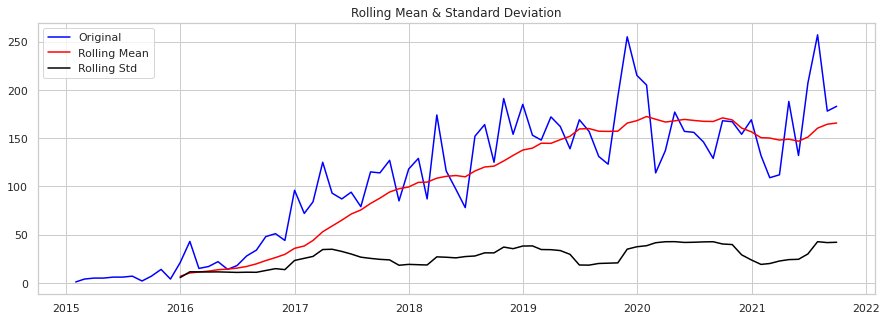

In [63]:
#Determine rolling statistics
rolmean = data.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = data.rolling(window=12).std()

#Plot rolling statistics
fig = plt.figure(figsize=(15,5))
orig = plt.plot(data, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

> From the above graph, we see that rolling mean itself has a trend component even though rolling standard deviation is fairly constant with time. For our time series to be stationary, we need to ensure that both the rolling statistics ie: mean & std. dev. remain time invariant or constant with time. Thus the curves for both of them have to be parallel to the x-axis, which in our case is not so.

In [64]:
#Perform Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(data['value'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                 -1.222352
p-value                         0.663907
#Lags Used                      4.000000
Number of Observations Used    76.000000
Critical Value (1%)            -3.519481
Critical Value (5%)            -2.900395
Critical Value (10%)           -2.587498
dtype: float64


For a Time series to be stationary, its ADCF test should have:
1. p-value to be low (according to the null hypothesis)
2. The critical values at 1%,5%,10% confidence intervals should be as close as possible to the Test Statistics

From the above ADCF test result, we see that p-value(at max can be 1.0) is very large. Also critical values are no where close to the Test Statistics. Hence, we can safely say that **our Time Series at the moment is not stationary**

#### Treatment for Non-stationarity
>* Log Scale Transformation.

#### Log Scale Transformation

In [65]:
#Estimating trend
data_logScale = np.log(data)
#The below transformation is required to make series stationary
movingAverage = data_logScale.rolling(window=12).mean()
movingSTD = data_logScale.rolling(window=12).std()

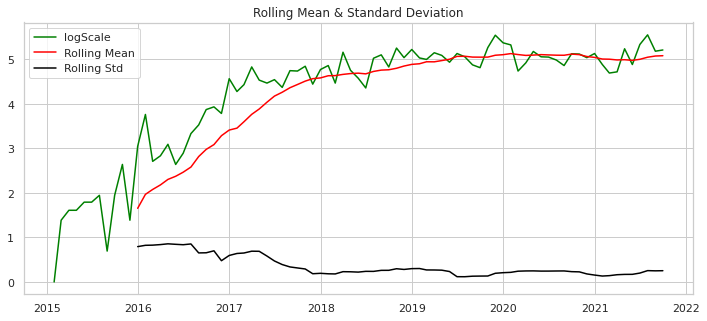

In [66]:
#Plot rolling statistics
fig = plt.figure(figsize=(12,5))
logScale =  plt.plot(data_logScale, color='green', label='logScale')
mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
std = plt.plot(movingSTD, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [67]:
datasetLogScaleMinusMovingAverage = data_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(5)

,value
date_added,
2015-01-31,NaN
2015-02-28,NaN
2015-03-31,NaN
2015-04-30,NaN
2015-05-31,NaN


In [68]:
#Remove NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(5)

,value
date_added,
2015-12-31,1.390895
2016-01-31,1.794139
2016-02-29,0.630843
2016-03-31,0.654025
2016-04-30,0.788387


In [69]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    fig = plt.figure(figsize=(15,5))
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['value'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)


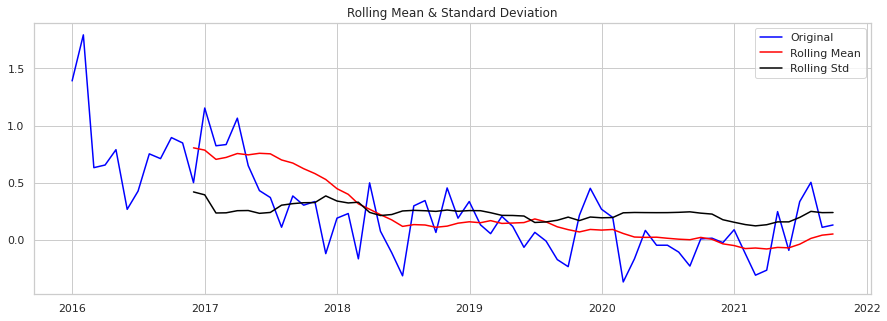

Results of Dickey Fuller Test:
Test Statistic                 -2.668460
p-value                         0.079657
#Lags Used                      2.000000
Number of Observations Used    67.000000
Critical Value (1%)            -3.531955
Critical Value (5%)            -2.905755
Critical Value (10%)           -2.590357
dtype: float64


In [70]:
test_stationarity(datasetLogScaleMinusMovingAverage)

From above graph, we observe that our intuition that *"subtracting two related series having similar trend components will make the result stationary"* is true. We find that:  

1. p-value has reduced from 0.66 to 0.079.  
2. The critical values at 1%,5%,10% confidence intervals are pretty close to the Test Statistic.
Thus, from above 2 points, we can say that our given series is stationary.  

But, in the spirit of getting higher accuracy.

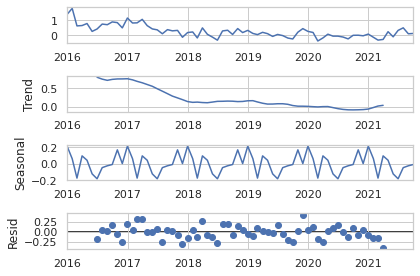

In [71]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(datasetLogScaleMinusMovingAverage, model ="additive").plot()
plt.plot()
plt.show()

### Plot ACF/PACF charts

In [72]:
def ACF_and_PACF(data):
    fig = plt.figure(figsize=(15,7))
    ax1 = fig.add_subplot(211)
    fig = plot_acf(data , lags = 30 , ax = ax1)
    ax2 = fig.add_subplot(212)
    fig = plot_pacf(data , lags = 30 , ax = ax2)

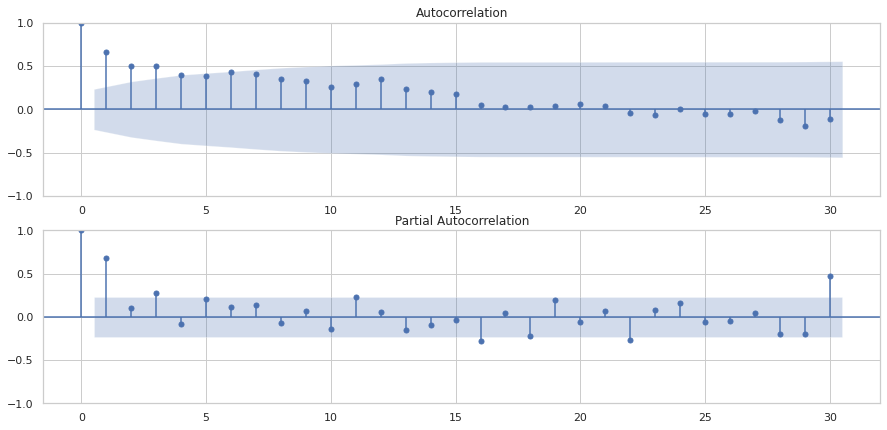

In [73]:
ACF_and_PACF(datasetLogScaleMinusMovingAverage)

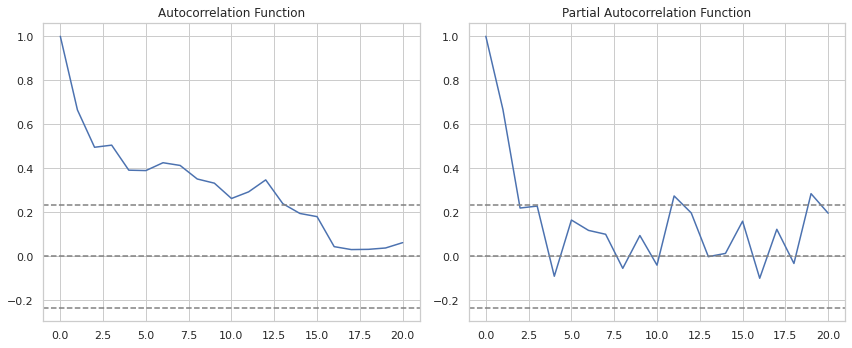

In [74]:
#ACF & PACF plots

lag_acf = acf(datasetLogScaleMinusMovingAverage, nlags=20)
lag_pacf = pacf(datasetLogScaleMinusMovingAverage, nlags=20, method='ols')

#Plot ACF:
fig = plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogScaleMinusMovingAverage)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogScaleMinusMovingAverage)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogScaleMinusMovingAverage)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogScaleMinusMovingAverage)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout() 
plt.show()

### Build the ARIMA model

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   70
Model:                 ARIMA(2, 1, 2)   Log Likelihood                  -6.970
Date:                Sat, 01 Oct 2022   AIC                             23.941
Time:                        12:18:46   BIC                             35.111
Sample:                    12-31-2015   HQIC                            28.373
                         - 09-30-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7051      0.251     -2.808      0.005      -1.197      -0.213
ar.L2          0.0123      0.233      0.053      0.958      -0.444       0.469
ma.L1          0.3204      0.218      1.470      0.1

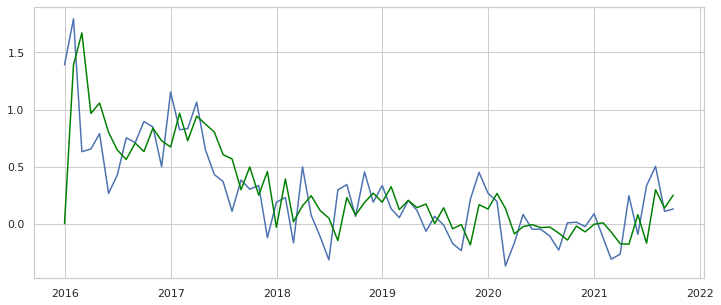

In [75]:
model = sm.tsa.arima.ARIMA(datasetLogScaleMinusMovingAverage , order= (2,1,2))
res_arma = model.fit()

fig = plt.figure(figsize=(12,5))
plt.plot(datasetLogScaleMinusMovingAverage)
plt.plot(res_arma.fittedvalues, color = "green")
print(res_arma.summary())

- The model summary provides lot of information. The table in the middle is the coefficients table where the values under ‘coef’ are the weights of the respective terms.

- The coefficient of the AR1 term is close to zero and the P-Value in ‘P>|z|’ column is highly insignificant. It should ideally be less than 0.05 for the respective X to be significant.

- So, we will rebuild the model.

In [76]:
from statsmodels.tsa.arima_model import ARIMA

model = pm.auto_arima(datasetLogScaleMinusMovingAverage.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=25.723, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=39.095, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=30.998, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=25.839, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=37.331, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=25.099, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=26.716, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=25.870, Time=0.30 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=24.116, Time=0.29 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=22.506, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=25.804, Time=0.12 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=24.359, Time=0.31 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=27.627, Time=0.21 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=21.942, Time=0.13 sec


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   70
Model:                 ARIMA(1, 1, 2)   Log Likelihood                  -6.971
Date:                Sat, 01 Oct 2022   AIC                             21.942
Time:                        12:18:50   BIC                             30.879
Sample:                    12-31-2015   HQIC                            25.488
                         - 09-30-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7171      0.165     -4.337      0.000      -1.041      -0.393
ma.L1          0.3314      0.174      1.905      0.057      -0.010       0.672
ma.L2         -0.6170      0.103     -5.994      0.0

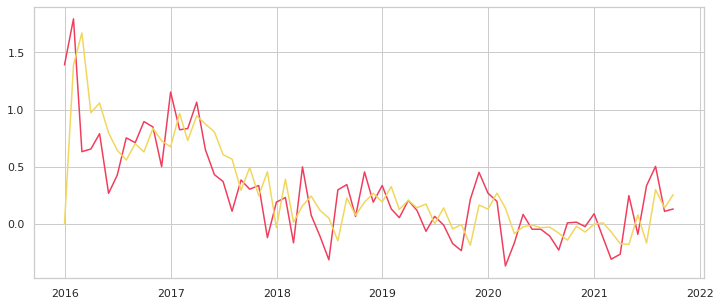

In [77]:
model = sm.tsa.arima.ARIMA(datasetLogScaleMinusMovingAverage , order= (1,1,2))
res_arima = model.fit()

fig = plt.figure(figsize=(12,5))
plt.plot(datasetLogScaleMinusMovingAverage, color = "#f03d5d")
plt.plot(res_arima.fittedvalues, color = "#f0d75d")
print(res_arima.summary())

### Diagnostic the Model

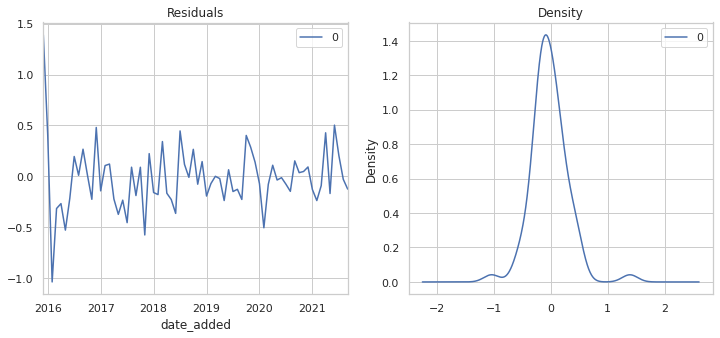

In [78]:
# Plot residual errors
residuals = pd.DataFrame(res_arima.resid)
fig, ax = plt.subplots(1,2,figsize=(12,5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

- The residual errors seem fine with near zero mean and uniform variance. Let’s plot the actuals against the fitted values using **plot_predict()**.

### Make Predictions

In [79]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = datasetLogScaleMinusMovingAverage.value[:63]
test = datasetLogScaleMinusMovingAverage.value[63:]

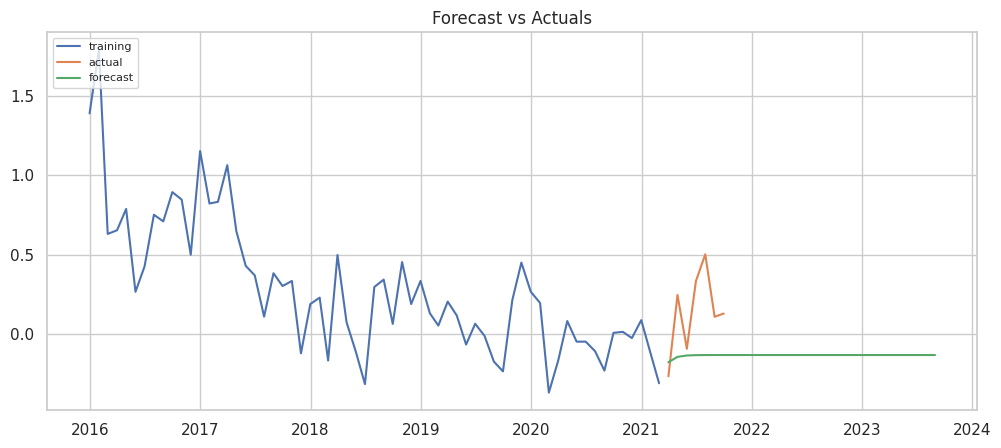

In [80]:
# Build Model
model = sm.tsa.arima.ARIMA(train, order=(1,1,1))  
fitted = model.fit()  

# Forecast
fc= fitted.forecast(steps=30, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()